#### **1 - Importando as Libs** 

In [2]:
import string, re
import pandas as pd
import unidecode
import nltk

from nltk import tokenize
from string import punctuation

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#modelos
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.model_selection import ParameterGrid

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

#download de dados da biblioteca dos corporas
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felipe/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### **2 - Carregando o Dataset**

In [3]:
imdb = pd.read_csv('imdb-reviews-pt-br.csv')
imdb.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


###### Observamos que existem 4 colunas, um id que não iremos utilizar na análise, o texto em inglês, português e o sentimento que é nossa variável Target</br>

###### Para o pré processamento do Dataframe utilizei os princípios mencionados neste artigo: 
###### https://medium.com/@pemagrg/pre-processing-text-in-python-ad13ea544dae <br> <br>

#### **3 - Validação e tratamento do Dataset**
-  1 - Avaliando a Distribuição para saber se o Dataset está balanceado
   

In [4]:
print(imdb['sentiment'].value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


###### O retorno nos mostra que os dados da variável Target estão Balanceados <br>

-  2 - Validando Nulos

In [5]:
print(imdb.isnull().sum())

id           0
text_en      0
text_pt      0
sentiment    0
dtype: int64


###### Não exitem nulos. O conjunto de dados está ok para o inicio dos trabalhos <br>

- 3 -  Trocando "neg" e "pos" por 0 e 1 <br>
Para analisar melhor os dados de sentimento e conseguir treinar o modelo, vamos representá-los numericamente. Em vez de "neg" de negativo e "pos" de positivo, trataremos apenas como 0 e 1.

In [6]:
#criando uma nova coluna para armazenar os dados neg e pos convertidos para 0 e 1
imdb['sentimento'] = imdb['sentiment'].replace(['neg', 'pos'], [0, 1])
imdb.head()

,id,text_en,text_pt,sentiment,sentimento
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


###### Agora existe mais uma coluna no DataFrame que iremos utilizar como nossa variável Target <br>

-  4 - Retirando a Acentuação (Conversão do Texto para o Formato Unicode) <br> Para remover a acentuação irei utilizar a biblioteca Unidecode <br>
Referência : https://pypi.org/project/Unidecode/

In [7]:
imdb['Final'] = imdb['text_pt'].apply(unidecode.unidecode)
imdb.head()

,id,text_en,text_pt,sentiment,sentimento,Final
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais uma vez, o Sr. Costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este e um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem mesmo os Beatles puderam escrever musicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,Filmes de fotos de latao nao e uma palavra apr...


###### É possível notar na coluna Final que já não existe mais acentuação no texto <br>

-  Deixar o texto em Caixa Baixa (Minúsculo) 

In [8]:
imdb['Final'] = imdb['Final'].str.lower()
imdb.head()

,id,text_en,text_pt,sentiment,sentimento,Final
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"mais uma vez, o sr. costner arrumou um filme p..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,este e um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"primeiro de tudo eu odeio esses raps imbecis, ..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem mesmo os beatles puderam escrever musicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes de fotos de latao nao e uma palavra apr...


In [9]:
# Removendo tudo que não for alfanumérico
imdb['Final'] = imdb['Final'].apply(
    lambda s: re.sub(r'[^a-zA-Z\s]', '', s)
)
imdb.head(10)

,id,text_en,text_pt,sentiment,sentimento,Final
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,mais uma vez o sr costner arrumou um filme por...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,este e um exemplo do motivo pelo qual a maiori...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro de tudo eu odeio esses raps imbecis q...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,nem mesmo os beatles puderam escrever musicas ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes de fotos de latao nao e uma palavra apr...
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,uma coisa engracada aconteceu comigo enquanto ...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,este filme de terror alemao tem que ser um dos...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,sendo um fa de longa data do cinema japones eu...
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,tokyo eyes fala de uma menina japonesa de ano...
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,fazendeiros ricos em buenos aires tem uma long...


###### Agora a coluna Final já não possui nenhum caractere em maiúsculo <br>

-  Retirando stop words <br> Stop words são palavras muito comuns na língua e que não carregam sentido por si só: preposições, artigos, pronomes, pontuações etc. <br> A biblioteca **nltk** possui uma lista de stop words em português 

In [10]:
stopWords = list()

# retirando acentuação das stop words da nltk
stopWordsNLTK = nltk.corpus.stopwords.words("portuguese")

for i in stopWordsNLTK:
    stopWords.append(unidecode.unidecode(i))

-  Processo de Tokenização:<br> iremos usar a função **tokenize** da **nltk** para separar as palavras e compará-las uma a uma com as nossas stop words.<br> o código abaixo, usamos **WordPunctTokenizer**, que separa as palavras e as pontuações do texto para serem comparadas.<br>
fonte: https://kite.com/python/docs/nltk.WordPunctTokenizer

In [11]:
token = tokenize.WordPunctTokenizer()

In [12]:
imdb['Final'] = imdb['Final'].apply(token.tokenize).apply(
    lambda x: [i for i in x if i not in stopWords]
).apply(' '.join)
imdb.head(10)

,id,text_en,text_pt,sentiment,sentimento,Final
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,filmes fotos latao palavra apropriada verdade ...
5,6,"A funny thing happened to me while watching ""M...",Uma coisa engraçada aconteceu comigo enquanto ...,neg,0,coisa engracada aconteceu comigo enquanto assi...
6,7,This German horror film has to be one of the w...,Este filme de terror alemão tem que ser um dos...,neg,0,filme terror alemao ser estranhos vi ciente qu...
7,8,"Being a long-time fan of Japanese film, I expe...","Sendo um fã de longa data do cinema japonês, e...",neg,0,sendo fa longa data cinema japones esperava re...
8,9,"""Tokyo Eyes"" tells of a 17 year old Japanese g...","""Tokyo Eyes"" fala de uma menina japonesa de 17...",neg,0,tokyo eyes fala menina japonesa anos cai homem...
9,10,Wealthy horse ranchers in Buenos Aires have a ...,Fazendeiros ricos em Buenos Aires têm uma long...,neg,0,fazendeiros ricos buenos aires longa politica ...


###### Observa-se que as StopWords foram removidas da Coluna Final <br>

- Analisando os termos mais frequentes por meio de Word Cloud

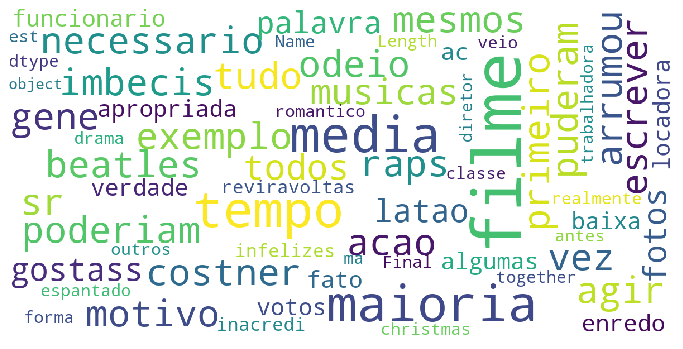

In [13]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=70
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(imdb['Final'])

#####  Extrairemos os Radicais, utilizando a técnica de *Stemmer*

In [14]:
#carraga o modelo para Aplicação de Stemmer
stemmer = nltk.RSLPStemmer()

imdb['Final'] = imdb['Final'].apply(token.tokenize).apply(
    lambda x: [stemmer.stem(i) for i in x]
).apply(' '.join)

In [15]:
imdb.head()

,id,text_en,text_pt,sentiment,sentimento,Final
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,film fot lata palavr apropri verdad tant ous q...


In [16]:
#Exibindo uma frase "normalizada"
imdb['Final'][5]

'cois engrac acontec comig enquant assist mosquit lad hero surdomud dire total incapaz faz entend faz faz manequim mutil er desculpem cadav atrav imag outr lad versa ingl menos mal dubl enta encontr desej tant menos dialog temp film estup car acess tod cemiteri necroteri cidad ond estari explor ano cen lesb gratuit mencion aspect roman oh doc'

###### o radical foi removido com sucesso <br> o Processo tornou o texto confuso de interpretar, entretanto é o que a máquina precisa para interpretar o texto sem ambiguidade <br> <br>

#### **4 - Treino e Teste**

-  1 TF-IDF e N-grams <br><br>
TF-IDF é um algoritmo que tem como objetivo indicar a importância de uma palavra numa coleção de textos. Palavras que possuem uma grande ocorrência em todos os casos e, por isso, não servem como uma boa forma de diferenciação, são classificadas como de menor importância para o algoritmo.<br>
Outra técnica usada para melhorar a análise é a de n-grams, que funciona como uma forma de criar contexto entre as palavras agrupando-as em sequência. No código abaixo, o ngram_range=(1, 2) significa que o modelo vai avaliar Bigramas

Eu encurtei o processo para não deixar o Notebook longo, foi testado com unigrama e trigrama também que não tiveram uma acurácia maior que a que tive logo segui com bigrama


In [17]:
Vetor = TfidfVectorizer(ngram_range=(1,2), use_idf=True, norm='l2')
Tf_Idf = Vetor.fit_transform(imdb.Final)

-  2 Separando o Dataframe em treino e teste <br>
Antes de iniciar a etapa de aplicação direta dos algoritimos de ML vamos separar os Dados de Treino e Teste em 70% Treino e 30% Teste

In [18]:
X_Treino, X_Teste, Y_Treino, Y_Teste = train_test_split(Tf_Idf, imdb['sentimento'], test_size=0.2, random_state = 70)

##### **5 - Aplicação de Modelos e teste de parametros** <br>

Aplicação dos Algorítimos de ML para ver qual tem a melhor Performance


-  Naive Bayes

In [20]:
# Inicializa o modelo e treina
modelo = MultinomialNB()
modelo.fit(X_Treino, Y_Treino)

# Fazer previsões
preds = modelo.predict(X_Teste)

print(confusion_matrix(Y_Teste,preds))
print(classification_report(Y_Teste,preds))
print("AUC: ", roc_auc_score(Y_Teste, preds))
print("Acurácia: ", accuracy_score(Y_Teste, preds))

[[4520  429]
 [ 677 4266]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      4949
           1       0.91      0.86      0.89      4943

    accuracy                           0.89      9892
   macro avg       0.89      0.89      0.89      9892
weighted avg       0.89      0.89      0.89      9892

AUC:  0.8881772309398879
Acurácia:  0.8881924787707238


##### Usando a aplicação direta de Naive Bayes já temos um resultado superior ao apresentado em sala de aula posso parar por aqui mais vamos dar aquela perseverada e tentar bater os 90% da meta

-  Regressão Logística

In [21]:
# treino
modelo = LogisticRegression(solver='lbfgs', random_state = 70)
modelo.fit(X_Treino, Y_Treino)

# Fazer previsões
preds = modelo.predict(X_Teste)

print(confusion_matrix(Y_Teste,preds))
print(classification_report(Y_Teste,preds))
print("AUC: ", roc_auc_score(Y_Teste, preds))
print("Acurácia: ", accuracy_score(Y_Teste, preds))

[[4344  605]
 [ 449 4494]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4949
           1       0.88      0.91      0.90      4943

    accuracy                           0.89      9892
   macro avg       0.89      0.89      0.89      9892
weighted avg       0.89      0.89      0.89      9892

AUC:  0.8934587782228826
Acurácia:  0.893449251920744


##### Usando a regressão Logística do próprio **sklearn** tivemos um aumento na assertividade do modelo em 1% onde acreditamos que o caminho é por ai <br> fizmos testes mudando de bigrama para unigrama e trigrama e a acurácia cai. <br>  


In [24]:
modelo = RandomForestClassifier(n_estimators=200, random_state=70, max_depth = 15)
modelo.fit(X_Treino, Y_Treino)

preds = modelo.predict(X_Teste)

print(confusion_matrix(Y_Teste,preds))
print(classification_report(Y_Teste,preds))
print("AUC: ", roc_auc_score(Y_Teste, preds))
print("Acurácia: ", accuracy_score(Y_Teste, preds))

[[4028  921]
 [ 660 4283]]
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      4949
           1       0.82      0.87      0.84      4943

    accuracy                           0.84      9892
   macro avg       0.84      0.84      0.84      9892
weighted avg       0.84      0.84      0.84      9892

AUC:  0.8401898229020779
Acurácia:  0.8401738778811161


In [22]:
modelo = SGDClassifier(alpha=0.0001, average=False, tol=0,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True, max_iter = 1000,
       l1_ratio=0.15, learning_rate='optimal', loss='log', n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, shuffle=True,
       validation_fraction=0.1, verbose=0, warm_start=False)

modelo.fit(X_Treino, Y_Treino)

preds = modelo.predict(X_Teste)

print(confusion_matrix(Y_Teste,preds))
print(classification_report(Y_Teste,preds))
print(roc_auc_score(Y_Teste, preds))
print("Acurácia: ", accuracy_score(Y_Teste, preds))

[[4180  769]
 [ 475 4468]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4949
           1       0.85      0.90      0.88      4943

    accuracy                           0.87      9892
   macro avg       0.88      0.87      0.87      9892
weighted avg       0.88      0.87      0.87      9892

0.8742597925912894
Acurácia:  0.8742418115649009


In [ ]:
modelo = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')

modelo.fit(X_Treino, Y_Treino)

preds = modelo.predict(X_Teste)

print(confusion_matrix(Y_Teste,preds))
print(classification_report(Y_Teste,preds))
print(roc_auc_score(Y_Teste, preds))
print("Acurácia: ", accuracy_score(Y_Teste, preds))